       Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
0               0  DK49336     Arizona              4809.216960       No   
1               1  KX64629  California              2228.525238       No   
2               2  LZ68649  Washington             14947.917300       No   
3               3  XL78013      Oregon             22332.439460      Yes   
4               4  QA50777      Oregon              9025.067525       No   
...           ...      ...         ...                      ...      ...   
10905       10905  FE99816      Nevada             15563.369440       No   
10906       10906  KX53892      Oregon              5259.444853       No   
10907       10907  TL39050     Arizona             23893.304100       No   
10908       10908  WA60547  California             11971.977650       No   
10909       10909  IV32877         NaN              6857.519928      NaN   

       Coverage Education Effective To Date EmploymentStatus Gender  ...  \
0         B

C:\Users\ashis\AppData\Local\Temp\ipykernel_3224\4008618881.py:47: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)



NaN counts per column after filling:
Unnamed: 0                          0
Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim             0
Months Since Policy Inception       0
Number of Open Complaints           0
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type

C:\Users\ashis\AppData\Local\Temp\ipykernel_3224\4008618881.py:88: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  describe_all = filtered_df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10910 entries, 0 to 10909
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     10910 non-null  int64         
 1   Customer                       10910 non-null  object        
 2   State                          10910 non-null  object        
 3   Customer Lifetime Value        10910 non-null  float64       
 4   Response                       10910 non-null  object        
 5   Coverage                       10910 non-null  object        
 6   Education                      10910 non-null  object        
 7   Effective To Date              10910 non-null  object        
 8   EmploymentStatus               10910 non-null  object        
 9   Gender                         10910 non-null  object        
 10  Income                         10910 non-null  int64         
 11  Location Code  

C:\Users\ashis\AppData\Local\Temp\ipykernel_3224\4008618881.py:106: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  describe_all = filtered_df.describe(include='all')


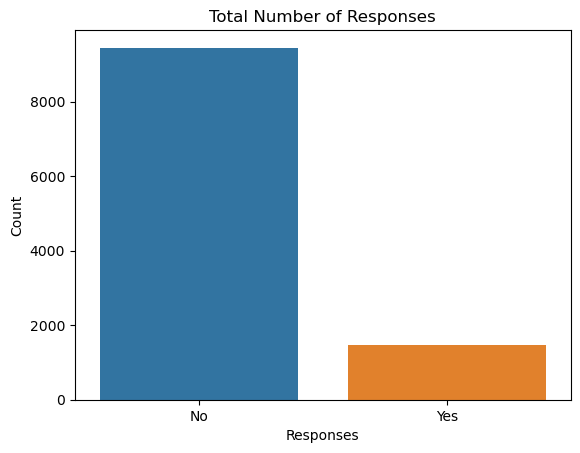

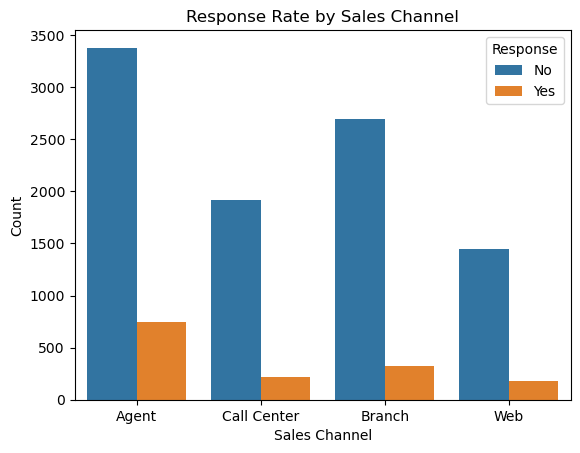

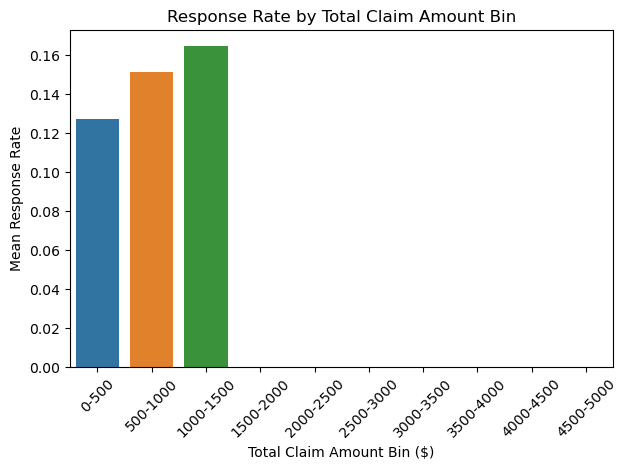

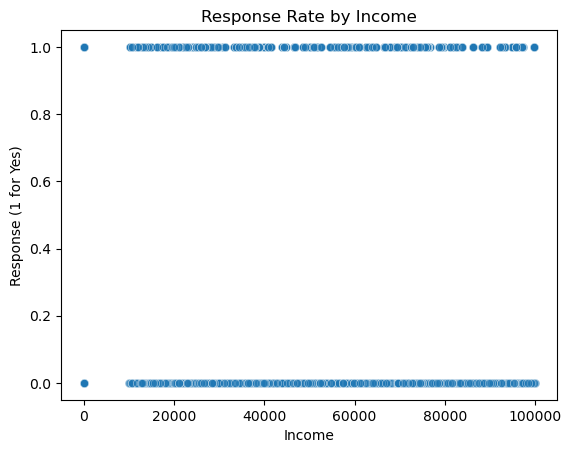

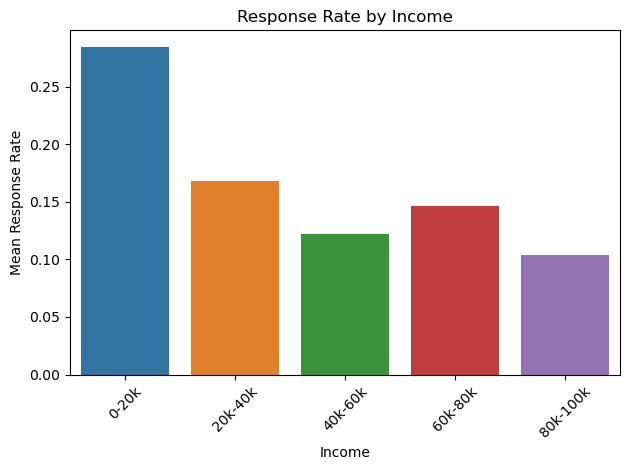

In [28]:
# Lab | Customer Analysis Round 2


!pip install seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



file1_path = r"C:\Users\ashis\Downloads\marketing_customer_analysis.csv"
df = pd.read_csv(file1_path)
print(df)

print("Shape of the DataFrame:", df.shape)

df.columns = df.columns.str.lower().str.replace(' ', '_')

print("Standardized column names:")
print(df.columns)

print("Shape of the DataFrame:", df.shape)


numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("Numerical columns:")
print(numerical_columns)

categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("Categorical columns:")
print(categorical_columns)
# Assuming df is your DataFrame loaded from CSV or another source
file1_path = r"C:\Users\ashis\Downloads\marketing_customer_analysis.csv"
df = pd.read_csv(file1_path)

# Check and deal with NaN values.

nan_counts = df.isna().sum()

print("NaN counts per column:")
print(nan_counts)


df.fillna(df.mean(), inplace=True)

nan_counts_after_fill = df.isna().sum()
print("\nNaN counts per column after filling:")
print(nan_counts_after_fill)

categorical_columns = df.select_dtypes(include=['object']).columns

# Check for NaN values in each categorical column
nan_counts_categorical = df[categorical_columns].isna().sum()

print("NaN counts per categorical column:")
print(nan_counts_categorical)

# Example of handling NaN values: fill with mode
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify NaN values have been filled
nan_counts_after_fill = df[categorical_columns].isna().sum()
print("\nNaN counts per categorical column after filling:")
print(nan_counts_after_fill)

print(df.columns)

df['date'] = pd.to_datetime(df['Effective To Date'])
df['month'] = df['date'].dt.month

# Filter data for the first quarter (January, February, and optionally March)
filtered_df = df[df['month'].isin([1, 2, 3])]

# Display the filtered DataFrame
print("Data for the first quarter (January, February, and March if data exists):")
print(filtered_df.head())

# Displaying the info of the processed DataFrame
print(filtered_df.info())

describe_numerical = filtered_df.describe()
print(describe_numerical)

describe_all = filtered_df.describe(include='all')
print(describe_all)


# Lab | Customer Analysis Round 3

# Displaying the info of the processed DataFrame

print(filtered_df.info())


# Displaying descriptive statistics for numerical columns
describe_numerical = filtered_df.describe()
print("Descriptive statistics for numerical columns:")
print(describe_numerical)


# Displaying descriptive statistics for all columns, including categorical ones
describe_all = filtered_df.describe(include='all')
print("Descriptive statistics for all columns:")
print(describe_all)



# Show a plot of the total number of responses.
print(df.columns)

# Print the first few rows to inspect the data
print(df.head())

# Plot the total number of responses
sns.countplot(x='Response', data=df)
plt.title('Total Number of Responses')
plt.xlabel('Responses')
plt.ylabel('Count')
plt.show()


# Create a count plot for the response rate by sales channel
sns.countplot(x='Sales Channel', hue='Response', data=df)
plt.title('Response Rate by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.legend(title='Response')
plt.show()


# Show a plot of the response rate by the total claim amount.
df['response_rate'] = df['Response'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

df['claim_amount_bins'] = pd.cut(df['Total Claim Amount'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000], labels=['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500-4000', '4000-4500', '4500-5000'])

response_rates = df.groupby('claim_amount_bins')['response_rate'].mean().reset_index()

sns.barplot(x='claim_amount_bins', y='response_rate', data=response_rates)
plt.title('Response Rate by Total Claim Amount Bin')
plt.xlabel('Total Claim Amount Bin ($)')
plt.ylabel('Mean Response Rate')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout if necessary
plt.show()


# Show a plot of the response rate by income

df['response_numeric'] = df['Response'].apply(lambda x: 1 if x == 'Yes' else 0)

sns.scatterplot(data=df, x='Income', y='response_numeric', alpha=0.5)
plt.title('Response Rate by Income')
plt.xlabel('Income')
plt.ylabel('Response (1 for Yes)')
plt.show()

df['income_bins'] = pd.cut(df['Income'], bins=[0, 20000, 40000, 60000, 80000, 100000], labels=['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k'])


response_rate_by_income = df.groupby('income_bins')['response_numeric'].mean().reset_index()

sns.barplot(data=response_rate_by_income, x='income_bins', y='response_numeric')
plt.title('Response Rate by Income')
plt.xlabel('Income')
plt.ylabel('Mean Response Rate')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout if necessary
plt.show()

In [27]:
import pandas as pd

def preprocess_data(file_path):
    # Load the DataFrame
    df = pd.read_csv(file_path)
    
    # Standardize column names
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    
    # Handle NaN values for numerical columns by filling with the mean
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
    
    # Handle NaN values for categorical columns by filling with the mode
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
    
    # Convert 'Effective To Date' to datetime format and extract the month
    df['date'] = pd.to_datetime(df['effective_to_date'])
    df['month'] = df['date'].dt.month
    
    # Filter data for the first quarter (January, February, and optionally March)
    df = df[df['month'].isin([1, 2, 3])]
    
    # Return the processed DataFrame
    return df

# Using the function
file_path = r"C:\Users\ashis\Downloads\marketing_customer_analysis.csv"
processed_df = preprocess_data(file_path)

# Display some information about the processed DataFrame
print("Shape of the processed DataFrame:", processed_df.shape)
print("\nData for the first quarter (January, February, and March if data exists):")
print(processed_df.head())

Shape of the processed DataFrame: (10910, 28)

Data for the first quarter (January, February, and March if data exists):
   unnamed:_0 customer       state  customer_lifetime_value response  \
0           0  DK49336     Arizona              4809.216960       No   
1           1  KX64629  California              2228.525238       No   
2           2  LZ68649  Washington             14947.917300       No   
3           3  XL78013      Oregon             22332.439460      Yes   
4           4  QA50777      Oregon              9025.067525       No   

   coverage education effective_to_date employmentstatus gender  ...  \
0     Basic   College           2/18/11         Employed      M  ...   
1     Basic   College           1/18/11       Unemployed      F  ...   
2     Basic  Bachelor           2/10/11         Employed      M  ...   
3  Extended   College           1/11/11         Employed      M  ...   
4   Premium  Bachelor           1/17/11    Medical Leave      F  ...   

      policy_